# Abalone: exploratory data analysis

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
abalone = pd.read_csv('data/abalone.data', sep=',')
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


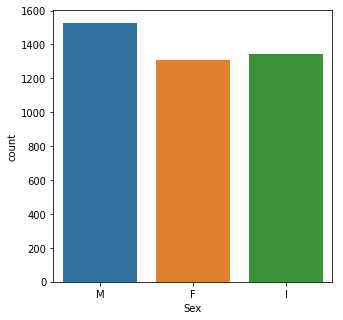

In [45]:
plt.figure(figsize=(5,5))
_ = sns.countplot(abalone.Sex)

In [28]:
def plot_distributions(attributes, lines, rows):
    pos = 1
    for att in attributes:
        plt.subplot(lines, rows, pos)
        _ = sns.distplot(abalone[att], kde=False)
        pos += 1

    for att in attributes:
        plt.subplot(lines, rows, pos)
        _ = sns.boxplot(abalone[att])
        pos += 1

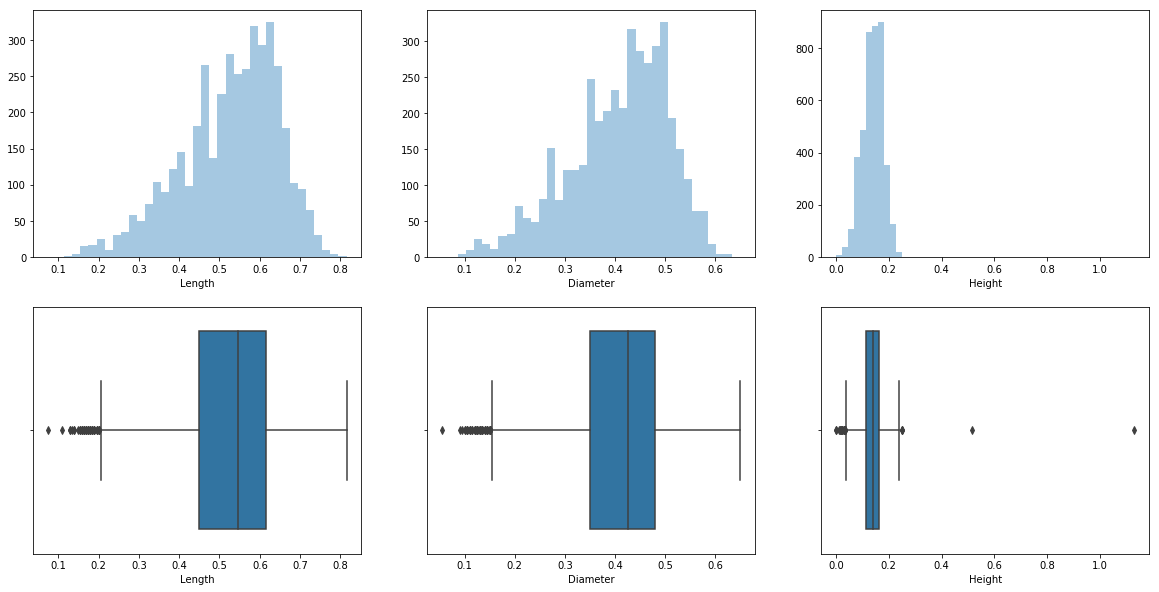

In [29]:
plt.figure(figsize=(20, 10))

plot_distributions(['Length', 'Diameter', 'Height'], 2, 3)

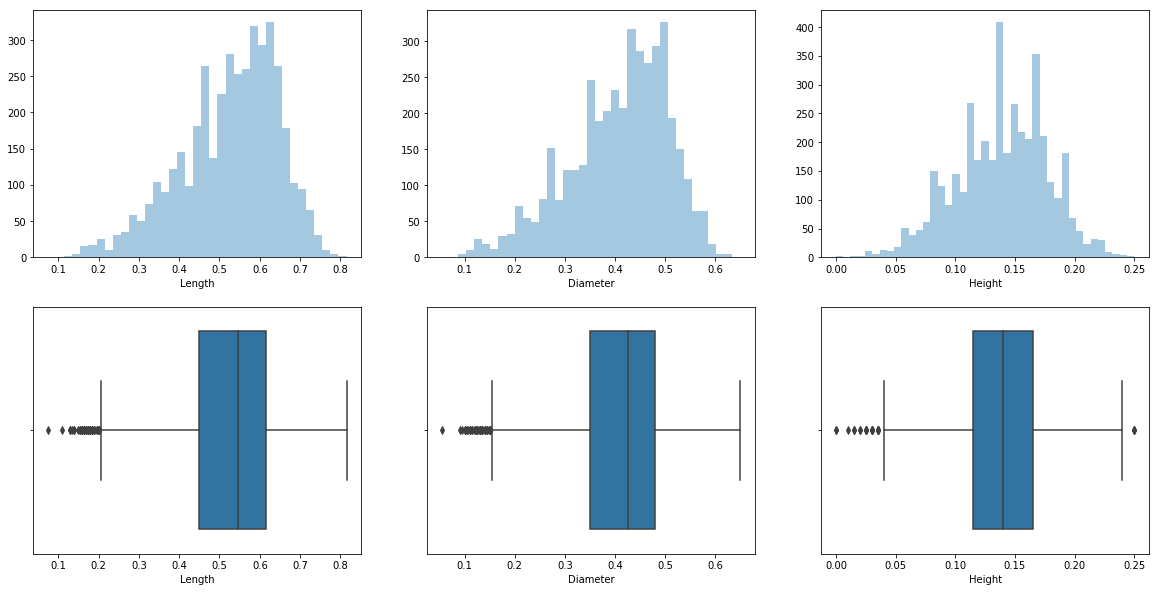

In [33]:
# removing outliers 

plt.figure(figsize=(20, 10))
abalone = abalone[abalone['Height'] < 0.4]
plot_distributions(['Length', 'Diameter', 'Height'], 2, 3)

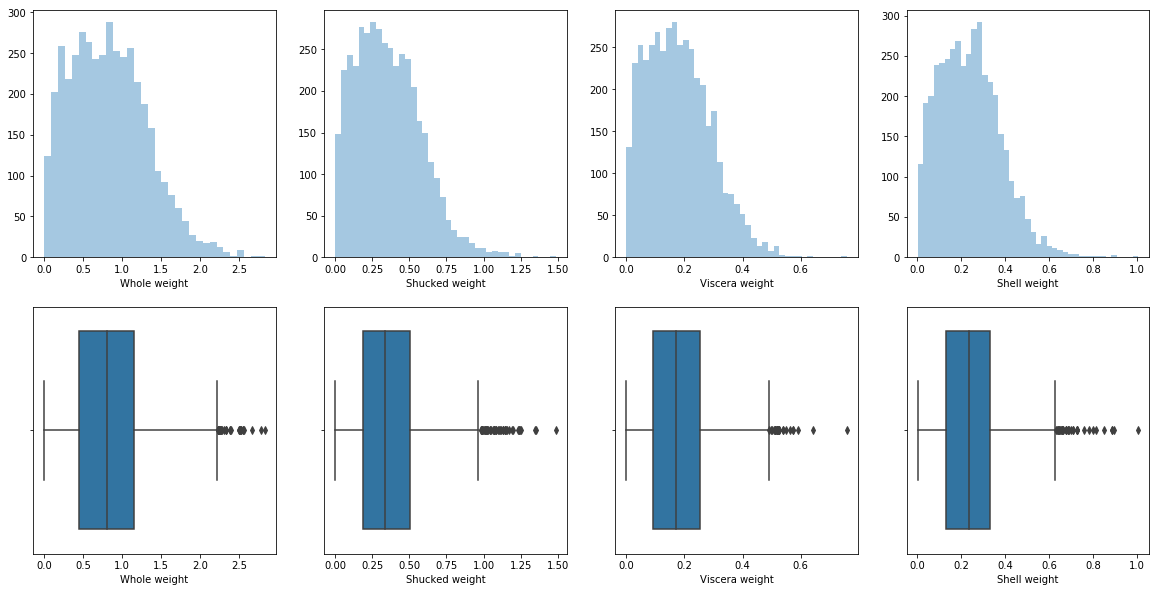

In [34]:
plt.figure(figsize=(20, 10))
plot_distributions(['Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight'], 2, 4)

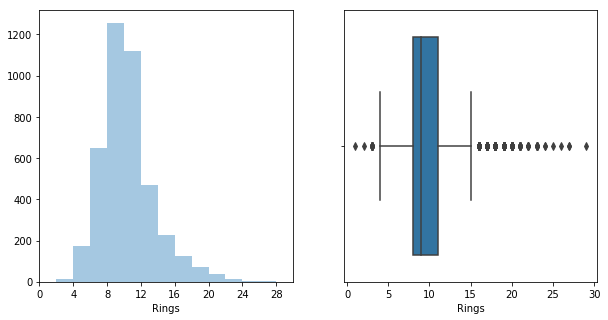

In [44]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.xticks(range(0, 31, 4))
plt.xlim(0, 30)
_ = sns.distplot(abalone['Rings'], kde=False, bins=range(0, 31, 2))

plt.subplot(1, 2, 2)
_ = sns.boxplot(abalone['Rings'])

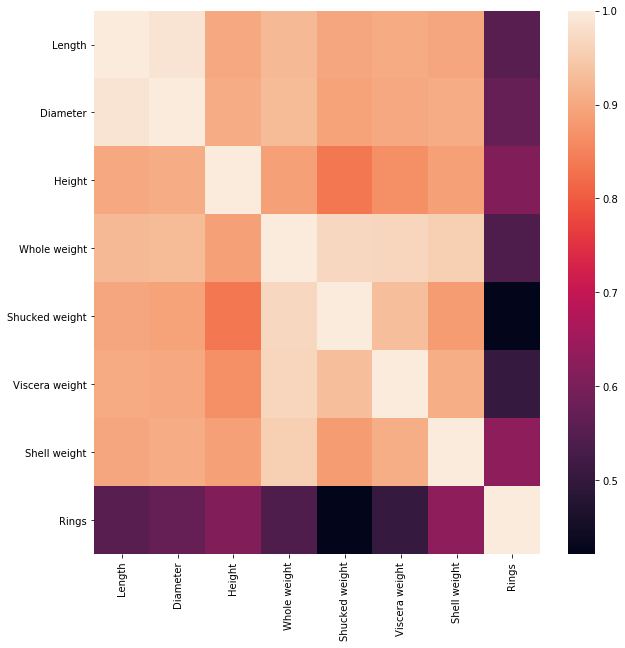

In [50]:
plt.figure(figsize=(10, 10))
corr = abalone.corr()
_ = sns.heatmap(corr)

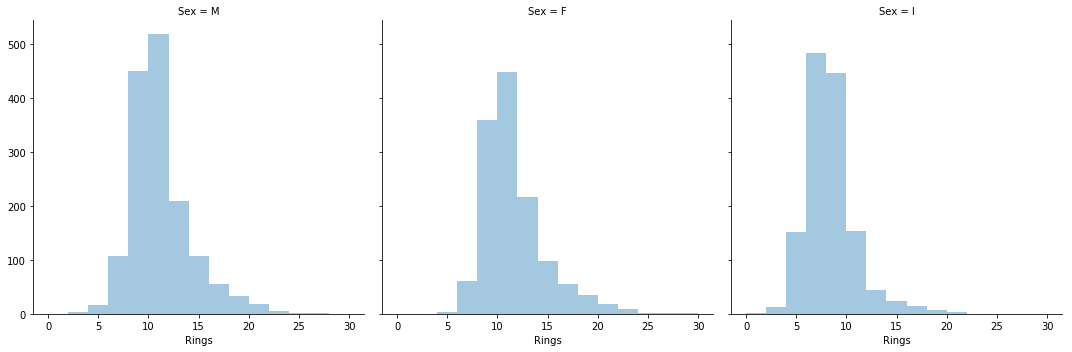

In [58]:
g = sns.FacetGrid(abalone, col='Sex', margin_titles=True, size=5)
_ = g.map(sns.distplot, 'Rings', kde=False, bins=range(0, 31, 2))